In [1]:
import networkx as nx
from node2vec import Node2Vec
import os
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

/Users/abishek/Desktop/Projects/virtual_envs/graph_ml/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir='/Users/abishek/Desktop/Abishek/graph_ml/data/'

In [3]:
#loading the data

all_data = []
all_edges = []

for root,dirs,files in os.walk(data_dir+'cora'):
    for file in files:
        if '.content' in file:
            with open(os.path.join(root,file),'r') as f:
                all_data.extend(f.read().splitlines())
        elif 'cites' in file:
            with open(os.path.join(root,file),'r') as f:
                all_edges.extend(f.read().splitlines())

                
#Shuffle the data because the raw data is ordered based on the label
random_state = 77
all_data = shuffle(all_data,random_state=random_state)

In [4]:
#parse the data
labels = []
nodes = []
X = []

for i,data in enumerate(all_data):
    elements = data.split('\t')
    labels.append(elements[-1])
    X.append(elements[1:-1])
    nodes.append(elements[0])

X = np.array(X,dtype=int)
N = X.shape[0] #the number of nodes
F = X.shape[1] #the size of node features
print('X shape: ', X.shape)


#parse the edge
edge_list=[]
for edge in all_edges:
    e = edge.split('\t')
    edge_list.append((e[0],e[1]))

print('\nNumber of nodes (N): ', N)
print('\nNumber of features (F) of each node: ', F)
print('\nCategories: ', set(labels))

num_classes = len(set(labels))
print('\nNumber of classes: ', num_classes)

X shape:  (2708, 1433)

Number of nodes (N):  2708

Number of features (F) of each node:  1433

Categories:  {'Neural_Networks', 'Rule_Learning', 'Case_Based', 'Reinforcement_Learning', 'Theory', 'Genetic_Algorithms', 'Probabilistic_Methods'}

Number of classes:  7


In [5]:
#build the graph
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edge_list)

#obtain the adjacency matrix (A)
A = nx.adjacency_matrix(G)
# print('Graph info: ', nx.info(G))

/var/folders/7m/7_856djs5bv_0f3r_m72d9fw0000gn/T/ipykernel_26367/2445717288.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


In [6]:
print(X.shape)
print(A.shape)

(2708, 1433)
(2708, 2708)


In [7]:
# Create a graph
graph = nx.fast_gnp_random_graph(n=100, p=0.5)

In [8]:
len(graph.nodes())

100

In [9]:
G.nodes()

NodeView(('7430', '159897', '1127530', '1107355', '248395', '28387', '10796', '672064', '714208', '739707', '683294', '1130080', '12158', '6217', '46470', '175291', '1103394', '1129778', '51831', '135765', '928873', '643221', '592973', '6898', '17811', '67415', '1106103', '232605', '1120858', '6378', '9559', '400356', '1109439', '595056', '1107312', '521251', '6771', '1102364', '67584', '318187', '1112911', '1129570', '241133', '1153065', '75121', '416867', '49811', '948846', '1127619', '424', '1136397', '1125467', '1136342', '633030', '158614', '1111899', '197452', '67246', '1105505', '647413', '1114526', '40125', '1125386', '180301', '1113534', '1131611', '738941', '22835', '28487', '12198', '567018', '177993', '192734', '228990', '65074', '1131607', '368431', '899085', '219218', '1153287', '1130678', '1117786', '35852', '593560', '13917', '521183', '134060', '1132385', '95597', '1106236', '10177', '1126011', '84695', '5959', '6125', '1128256', '1125895', '411092', '1152194', '350319

In [10]:
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:29<00:00,  1.71it/s]

In [11]:
model = node2vec.fit(window=10, min_count=1, batch_words=4)

In [12]:
embeddings=model.wv

In [13]:
activations =[]
for node in G.nodes():
    activations.append(embeddings[node])

In [14]:
activations=np.array(activations)

In [15]:
activations.shape

(2708, 64)

In [16]:
x_tsne = TSNE(n_components=2).fit_transform(activations)

In [17]:
def encode_label(labels):
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)
    labels = to_categorical(labels)
    return labels, label_encoder.classes_

labels_encoded, classes = encode_label(labels)

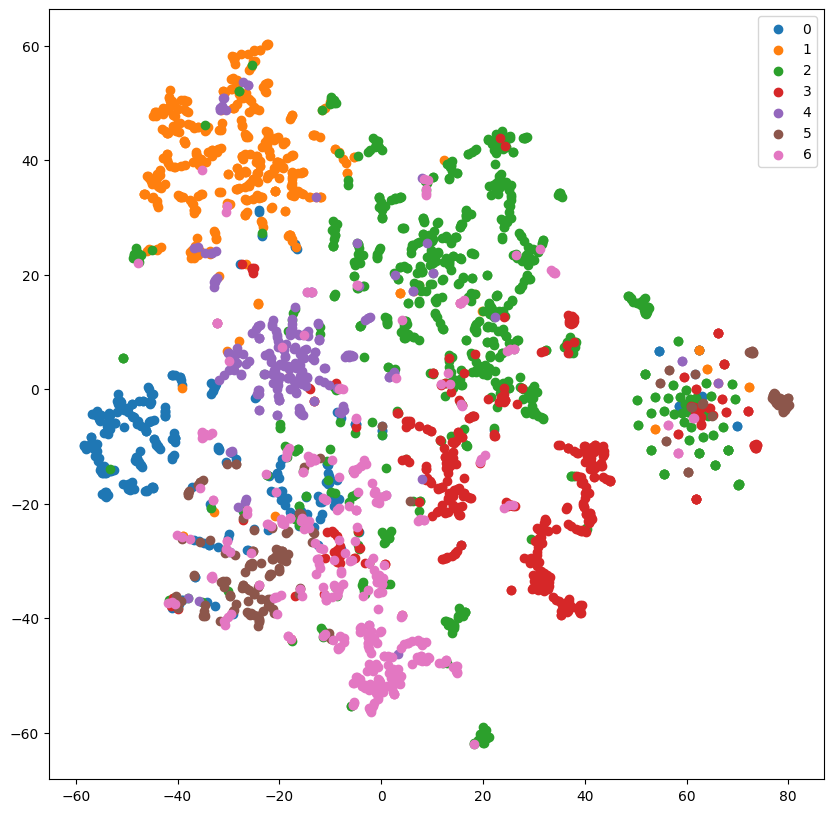

In [18]:
def plot_tSNE(labels_encoded,x_tsne):
    color_map = np.argmax(labels_encoded, axis=1)
    plt.figure(figsize=(10,10))
    for cl in range(num_classes):
        indices = np.where(color_map==cl)
        indices = indices[0]
        plt.scatter(x_tsne[indices,0], x_tsne[indices, 1], label=cl)
    plt.legend()
    plt.show()
    
plot_tSNE(labels_encoded,x_tsne)